# Introduction
Convolutional Neural Networks have evolved through a sequence of bold ideas, each addressing the limitations of what came before. This notebook is a hands-on exploration of the CNN architectures that fundamentally shaped modern computer vision: **LeNet-5**, **AlexNet**, **VGGNet**, **GoogLeNet**, **ResNet**, **SENet**, and **Xception**. Rather than treating these models as isolated designs, the goal is to understand why they were proposed, what problem each solved, and how their core ideas influenced future architectures. Implementing them from scratch helps reveal the design principles that still guide deep learning systems today.

In [1]:
from typing import List, Tuple
import tensorflow as tf
import keras
from keras.models import Model
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Input, Add, Multiply, Dense, ZeroPadding2D, Activation, Conv2D, MaxPooling2D, BatchNormalization, Flatten, AveragePooling2D, Concatenate, Dropout, GlobalAveragePooling2D, Reshape, SeparableConv2D
from tensorflow.keras.initializers import glorot_uniform

2025-12-28 17:10:31.455282: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1766941831.758851      17 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1766941831.846869      17 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1766941832.557331      17 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1766941832.557442      17 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1766941832.557451      17 computation_placer.cc:177] computation placer alr

# LeNet-5
*Yann LeCun et al., “Gradient-Based Learning Applied to Document Recognition”, Proceedings of the IEEE 86, no. 11 (1998): 2278–2324.*

LeNet, particularly LeNet-5, is a foundational convolutional neural network (CNN) architecture created by Yann LeCun and his team in the 1998, pioneering handwritten digit recognition for tasks like reading checks, establishing key concepts like convolutional layers, pooling, and weight sharing that are still vital in modern deep learning and computer vision. It's considered a "Hello World" for CNNs due to its simple yet effective design, using convolutional layers for feature extraction and fully connected layers for classification.


![image0.png](https://miro.medium.com/v2/resize:fit:4800/format:webp/1*IpZui_5--QsgdCKn5PsIOA.png)

In [2]:
lenet5 = Sequential([
    # C1: Convolution 5x5 with 6 feature maps
    Conv2D(filters=6, kernel_size=(5, 5), activation="tanh", input_shape=[28,28,1]),
    # S2: Avg pooling
    AveragePooling2D(pool_size=(2, 2), strides=2),
    # C3: Convolution 5x5 with 16 feature maps
    Conv2D(filters=16, kernel_size=(5, 5), activation="tanh"),
    # S4: Avg Pooling
    AveragePooling2D(pool_size=(2, 2), strides=2),
    # C5: Convolution 5x5 with 120 feature maps
    Conv2D(filters=120, kernel_size=(5, 5), activation="tanh"),
    # F6: Fully Connected Layer with 84 units
    Dense(84, activation="tanh"),
    # Out: Fully Connected Layer with 10 units
    Dense(10, activation="softmax")
])
lenet5.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-12-28 17:10:56.436010: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 24, 24, 6)      │           156 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d               │ (None, 12, 12, 6)      │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 8, 8, 16)       │         2,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_1             │ (None, 4, 4, 16)       │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 0, 0, 120)      │        48,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 0, 0, 84)       │        10,164 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 0, 0, 10)       │           850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 61,706 (241.04 KB)

 Trainable params: 61,706 (241.04 KB)

 Non-trainable params: 0 (0.00 B)

# AlexNet
*Alex Krizhevsky et al., “ImageNet Classification with Deep Convolutional Neural Networks”, Proceedings of the 25th International Conference on Neural Information Processing Systems 1 (2012): 1097–1105.*

AlexNet is a groundbreaking 8-layer Convolutional Neural Network (CNN) that revolutionized image recognition by winning the 2012 ILSVRC, significantly reducing error rates through innovations like ReLU activation, dropout for overfitting, and training on GPUs, proving that deep networks could learn complex visual features automatically and paving the way for modern deep learning in computer vision.


![image1.png](https://miro.medium.com/v2/resize:fit:1400/1*0dsWFuc0pDmcAmHJUh7wqg.png)

In [3]:
alexnet = Sequential([
    # C1: Convolution 11x11 with 96 feature maps
    Conv2D(filters=96, kernel_size=(11, 11), padding="valid", strides=4, input_shape=[227,227,3]),
    Activation('relu'),
    # S2: Max pooling
    MaxPooling2D(pool_size=(3, 3), strides=2),
    BatchNormalization(),
    # C3: Convolution 5x5 with 256 feature maps
    Conv2D(filters=256, kernel_size=(5, 5), padding="same"),
    Activation('relu'),
    # S4: Max Pooling
    MaxPooling2D(pool_size=(3, 3), strides=2),
    BatchNormalization(),
    # C5: Convolution 3x3 with 384 feature maps
    Conv2D(filters=384, kernel_size=(3, 3), padding="same"),
    Activation('relu'),
    BatchNormalization(),
    # C6: Convolution 3x3 with 384 feature maps
    Conv2D(filters=384, kernel_size=(3, 3), padding="same"),
    Activation('relu'),
    BatchNormalization(),
    # C7: Convolution 3x3 with 256 feature maps
    Conv2D(filters=256, kernel_size=(3, 3), padding="same"),
    Activation('relu'),
    # S8: Max Pooling
    MaxPooling2D(pool_size=(3, 3), strides=2),
    BatchNormalization(),
    Flatten(),
    # F9: Fully Connected Layer with 4096 units
    Dense(4096, input_shape=(224*224*3,)),
    Activation('relu'),
    # F10: Fully Connected Layer with 4096 units
    Dense(4096),
    Activation('relu'),
    # Out: Fully Connected Layer with 1000 units
    Dense(1000),
    Activation('softmax')
])
alexnet.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 55, 55, 96)     │        34,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 55, 55, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 27, 27, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 27, 27, 96)     │           384 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 27, 27, 256)    │       614,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 27, 27, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 13, 13, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 13, 13, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 13, 13, 384)    │       885,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 13, 13, 384)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 13, 13, 384)    │         1,536 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 13, 13, 384)    │     1,327,488 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 13, 13, 384)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 13, 13, 384)    │         1,536 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 13, 13, 256)    │       884,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 13, 13, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 6, 6, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4096)           │    37,752,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 62,383,848 (237.98 MB)

 Trainable params: 62,381,096 (237.96 MB)

 Non-trainable params: 2,752 (10.75 KB)

# GoogLeNet
*Christian Szegedy et al., “Going Deeper with Convolutions”, Proceedings of the IEEE Conference on Computer Vision and Pattern Recognition (2015): 1–9.*


The GoogLeNet architecture was developed by Christian Szegedy et al. from Google Research,13 and it won the 2014 ILSVRC challenge by pushing the top-five error rate below 7%. This great performance came in large part from the fact that the network was much deeper than previous CNNs. This was made possible by subnetworks called inception modules, 14 which allow GoogLeNet to use parameters much more efficiently than previous architectures: GoogLeNet actually has 10 times fewer parameters than AlexNet (roughly 6 million instead of 60 million).

![image2.png](https://viso.ai/wp-content/uploads/2024/04/inception-with-reduction.png)

**First we will make an inception block**

In [4]:
def Inception_block(input_layer, f1, f2_conv1, f2_conv3, f3_conv1, f3_conv5, f4):
    """
    Input: 
    - f1: number of filters of the 1x1 convolutional layer in the first path
    - f2_conv1, f2_conv3 are number of filters corresponding to the 1x1 and 3x3 convolutional layers in the second path
    - f3_conv1, f3_conv5 are the number of filters corresponding to the 1x1 and 5x5  convolutional layer in the third path
    - f4: number of filters of the 1x1 convolutional layer in the fourth path
    """
    
    # 1st path
    path1 = Conv2D(filters=f1, kernel_size=(1,1), padding='same', activation='relu')(input_layer)

    # 2nd path
    path2 = Conv2D(filters=f2_conv1, kernel_size=(1,1), padding='same', activation='relu')(input_layer)
    path2 = Conv2D(filters=f2_conv3, kernel_size=(3,3), padding='same', activation='relu')(path2)

    # 3rd path
    path3 = Conv2D(filters=f3_conv1, kernel_size=(1,1), padding='same', activation='relu')(input_layer)
    path3 = Conv2D(filters=f3_conv5, kernel_size=(5,5), padding='same', activation='relu')(path3)

    # 4th path
    path4 = MaxPooling2D((3,3), strides=1, padding='same')(input_layer)
    path4 = Conv2D(filters=f4, kernel_size=(1,1), padding='same', activation='relu')(path4)

    output_layer = Concatenate()([path1, path2, path3, path4])
    return output_layer

Now let's build the GoogLeNet

![image3.png](https://miro.medium.com/v2/resize:fit:1400/0*q5eMDjUHKqEyo7qY.png)

In [5]:
def GoogLeNet():
  # input layer 
  input_layer = Input(shape = (224, 224, 3))

  # convolutional layer: filters = 64, kernel_size = (7,7), strides = 2
  X = Conv2D(filters = 64, kernel_size = (7,7), strides = 2, padding = 'valid', activation = 'relu')(input_layer)

  # max-pooling layer: pool_size = (3,3), strides = 2
  X = MaxPooling2D(pool_size = (3,3), strides = 2)(X)

  # convolutional layer: filters = 64, strides = 1
  X = Conv2D(filters = 64, kernel_size = (1,1), strides = 1, padding = 'same', activation = 'relu')(X)

  # convolutional layer: filters = 192, kernel_size = (3,3)
  X = Conv2D(filters = 192, kernel_size = (3,3), padding = 'same', activation = 'relu')(X)

  # max-pooling layer: pool_size = (3,3), strides = 2
  X = MaxPooling2D(pool_size= (3,3), strides = 2)(X)

  # 1st Inception block
  X = Inception_block(X, f1 = 64, f2_conv1 = 96, f2_conv3 = 128, f3_conv1 = 16, f3_conv5 = 32, f4 = 32)

  # 2nd Inception block
  X = Inception_block(X, f1 = 128, f2_conv1 = 128, f2_conv3 = 192, f3_conv1 = 32, f3_conv5 = 96, f4 = 64)

  # max-pooling layer: pool_size = (3,3), strides = 2
  X = MaxPooling2D(pool_size= (3,3), strides = 2)(X)

  # 3rd Inception block
  X = Inception_block(X, f1 = 192, f2_conv1 = 96, f2_conv3 = 208, f3_conv1 = 16, f3_conv5 = 48, f4 = 64)

  # Extra network 1:
  X1 = AveragePooling2D(pool_size = (5,5), strides = 3)(X)
  X1 = Conv2D(filters = 128, kernel_size = (1,1), padding = 'same', activation = 'relu')(X1)
  X1 = Flatten()(X1)
  X1 = Dense(1024, activation = 'relu')(X1)
  X1 = Dropout(0.7)(X1)
  X1 = Dense(5, activation = 'softmax')(X1)

  
  # 4th Inception block
  X = Inception_block(X, f1 = 160, f2_conv1 = 112, f2_conv3 = 224, f3_conv1 = 24, f3_conv5 = 64, f4 = 64)

  # 5th Inception block
  X = Inception_block(X, f1 = 128, f2_conv1 = 128, f2_conv3 = 256, f3_conv1 = 24, f3_conv5 = 64, f4 = 64)

  # 6th Inception block
  X = Inception_block(X, f1 = 112, f2_conv1 = 144, f2_conv3 = 288, f3_conv1 = 32, f3_conv5 = 64, f4 = 64)

  # Extra network 2:
  X2 = AveragePooling2D(pool_size = (5,5), strides = 3)(X)
  X2 = Conv2D(filters = 128, kernel_size = (1,1), padding = 'same', activation = 'relu')(X2)
  X2 = Flatten()(X2)
  X2 = Dense(1024, activation = 'relu')(X2)
  X2 = Dropout(0.7)(X2)
  X2 = Dense(1000, activation = 'softmax')(X2)
  
  
  # 7th Inception block
  X = Inception_block(X, f1 = 256, f2_conv1 = 160, f2_conv3 = 320, f3_conv1 = 32, 
                      f3_conv5 = 128, f4 = 128)

  # max-pooling layer: pool_size = (3,3), strides = 2
  X = MaxPooling2D(pool_size = (3,3), strides = 2)(X)

  # 8th Inception block
  X = Inception_block(X, f1 = 256, f2_conv1 = 160, f2_conv3 = 320, f3_conv1 = 32, f3_conv5 = 128, f4 = 128)

  # 9th Inception block
  X = Inception_block(X, f1 = 384, f2_conv1 = 192, f2_conv3 = 384, f3_conv1 = 48, f3_conv5 = 128, f4 = 128)

  # Global Average pooling layer 
  X = GlobalAveragePooling2D(name = 'GAPL')(X)

  # Dropoutlayer 
  X = Dropout(0.4)(X)

  # output layer 
  X = Dense(1000, activation = 'softmax')(X)
  
  # model
  model = Model(input_layer, [X, X1, X2], name = 'GoogLeNet')

  return model

In [6]:
googlenet = GoogLeNet()
googlenet.summary()

Model: "GoogLeNet"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_8 (Conv2D)   │ (None, 109, 109,  │      9,472 │ input_layer_2[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_3     │ (None, 54, 54,    │          0 │ conv2d_8[0][0]    │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_9 (Conv2D)   │ (None, 54, 54,    │      4,160 │ max_pooling2d_3[… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_10 (Conv2D)  │ (None, 54, 54,    │    110,784 │ conv2d_9[0][0]    │
│                     │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_4     │ (None, 26, 26,    │          0 │ conv2d_10[0][0]   │
│ (MaxPooling2D)      │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_12 (Conv2D)  │ (None, 26, 26,    │     18,528 │ max_pooling2d_4[… │
│                     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_14 (Conv2D)  │ (None, 26, 26,    │      3,088 │ max_pooling2d_4[… │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_5     │ (None, 26, 26,    │          0 │ max_pooling2d_4[… │
│ (MaxPooling2D)      │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_11 (Conv2D)  │ (None, 26, 26,    │     12,352 │ max_pooling2d_4[… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_13 (Conv2D)  │ (None, 26, 26,    │    110,720 │ conv2d_12[0][0]   │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_15 (Conv2D)  │ (None, 26, 26,    │     12,832 │ conv2d_14[0][0]   │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_16 (Conv2D)  │ (None, 26, 26,    │      6,176 │ max_pooling2d_5[… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 26, 26,    │          0 │ conv2d_11[0][0],  │
│ (Concatenate)       │ 256)              │            │ conv2d_13[0][0],  │
│                     │                   │            │ conv2d_15[0][0],  │
│                     │                   │            │ conv2d_16[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_18 (Conv2D)  │ (None, 26, 26,    │     32,896 │ concatenate[0][0] │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_20 (Conv2D)  │ (None, 26, 26,    │      8,224 │ concatenate[0][0] │
│                     │ 32)               │            │                 

 Total params: 10,523,397 (40.14 MB)

 Trainable params: 10,523,397 (40.14 MB)

 Non-trainable params: 0 (0.00 B)

# VGGNet
*Karen Simonyan and Andrew Zisserman, “Very Deep Convolutional Networks for Large-Scale Image Recognition”, arXiv preprint arXiv:1409.1556 (2014).*

VGGNet (Visual Geometry Group Network) is a famous deep convolutional neural network (CNN) architecture from Oxford University which came runner up in 2014 ILSVRC, known for proving that network depth significantly improves image recognition accuracy, primarily using small 3x3 filters. Popular versions like VGG-16 and VGG-19 achieved top performance becoming influential for their simple, uniform design and extensive use of small convolutional filters to build complex feature extractors, though they are computationally heavy.

![image4.png](https://viso.ai/wp-content/uploads/2024/04/vgg-16.bak.png)

Let's build VGG-16

In [7]:
vgg_input = Input(shape=(224,224,3))

conv1  = Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu")(vgg_input)
conv2  = Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu")(conv1)
pool1  = MaxPooling2D((2, 2))(conv2)

conv3  = Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu")(pool1)
conv4  = Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu")(conv3)
pool2  = MaxPooling2D((2, 2))(conv4)

conv5  = Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu")(pool2)
conv6  = Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu")(conv5)
conv7  = Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu")(conv6)
pool3  = MaxPooling2D((2, 2))(conv7)

conv8  = Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu")(pool3)
conv9  = Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu")(conv8)
conv10 = Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu")(conv9)
pool4  = MaxPooling2D((2, 2))(conv10)

conv11 = Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu")(pool4)
conv12 = Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu")(conv11)
conv13 = Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu")(conv12)
pool5  = MaxPooling2D((2, 2))(conv13)

flat   = Flatten()(pool5)
dense1 = Dense(4096, activation="relu")(flat)
dense2 = Dense(4096, activation="relu")(dense1)
output = Dense(1000, activation="softmax")(dense2)

vgg16_model = Model(inputs=vgg_input, outputs=output, name='VGG16')
vgg16_model.summary()

Model: "VGG16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_67 (Conv2D)              │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_68 (Conv2D)              │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_69 (Conv2D)              │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_70 (Conv2D)              │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_71 (Conv2D)              │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_72 (Conv2D)              │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_73 (Conv2D)              │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_74 (Conv2D)              │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_75 (Conv2D)              │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_76 (Conv2D)              │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_77 (Conv2D)              │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_78 (Conv2D)              │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_79 (Conv2D)              │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_20 (MaxPooling2D) │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 4096)           │   102,764,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 1000)           │     4,097,000 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 138,357,544 (527.79 MB)

 Trainable params: 138,357,544 (527.79 MB)

 Non-trainable params: 0 (0.00 B)

# ResNet
*Kaiming He et al., “Deep Residual Learning for Image Recognition”, arXiv preprint arXiv:1512:03385 (2015).*

ResNet (Residual Network) is a groundbreaking deep neural network architecture, winner of 2015 ILSVRC, famous for introducing "shortcut connections" (skip connections) that let signals bypass layers, solving the vanishing gradient problem and enabling training of extremely deep networks (hundreds/thousands of layers) for computer vision tasks. By learning the "residual" (difference) rather than the direct mapping, ResNet significantly improved accuracy and became foundational in AI.

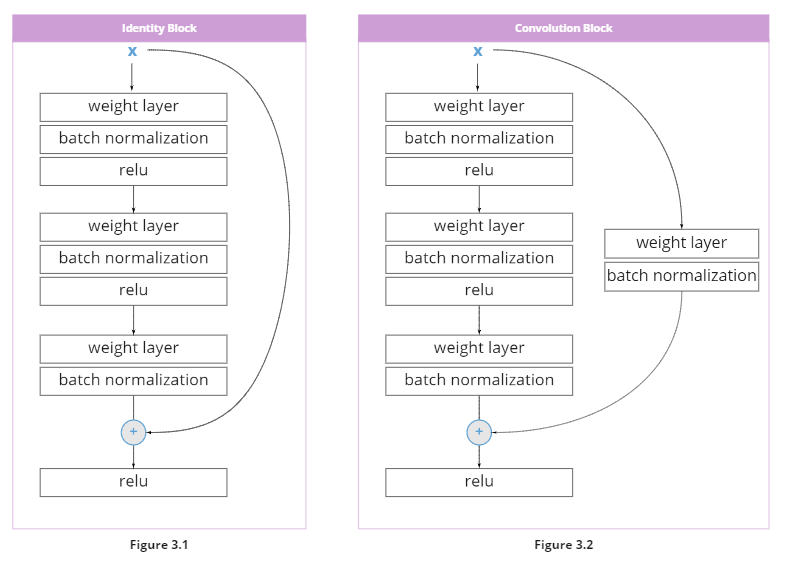

The Identity Block maintains input/output dimensions (same features, size), while the Convolutional Block changes dimensions (downsampling/increasing filters) to match when input/output shapes differ, using a 1x1 conv layer for projection, allowing direct addition of input features to deeper outputs.

## Identity Block

In [8]:
def identity_block(X: tf.Tensor, level: int, block: int, filters: List[int]) -> tf.Tensor:
    """
    Creates an identity block(see Figure 3.1)

    Input:
        X - input tensor of shape (m, height_prev, width_prev, channels_prev)
        level - integer, one of the 5 levels that our networks is conceptually divided into
        block - integer, each conceptual level has multiple blocks
        filters - list of integers, each of them defining the number of filters in each convolutional layer

    Output:
        X - output tensor of shape (m, height, width, channels)
    """

    # naming of layers
    conv_name = f'conv{level}_{block}' + '_{layer}_{type}'
    
    # unpacking number of filters
    f1, f2, f3 = filters
    
    # shortcut branch
    X_shortcut = X

    # first convolutional layer
    X = Conv2D(filters=f1, kernel_size=(1,1), strides=(1,1), padding='valid', kernel_initializer=glorot_uniform(seed=0), name=conv_name.format(layer=1, type="conv"))(X)
    X = BatchNormalization(axis=3, name=conv_name.format(layer=1, type='bn'))(X)
    X = Activation('relu', name=conv_name.format(layer=1, type='relu'))(X)

    # second convolutional layer
    X = Conv2D(filters=f2, kernel_size=(3,3), strides=(1,1), padding='same', kernel_initializer=glorot_uniform(seed=0), name=conv_name.format(layer=2, type="conv"))(X)
    X = BatchNormalization(axis=3, name=conv_name.format(layer=2, type='bn'))(X)
    X = Activation('relu', name=conv_name.format(layer=2, type='relu'))(X)

    # third convolutional layer
    X = Conv2D(filters=f3, kernel_size=(1,1), strides=(1,1), padding='valid', kernel_initializer=glorot_uniform(seed=0), name=conv_name.format(layer=3, type="conv"))(X)
    X = BatchNormalization(axis=3, name=conv_name.format(layer=3, type='bn'))(X)

    # add shortcut branch to main path
    X = Add()([X, X_shortcut])

    # relu activation at the end of block
    X = Activation('relu', name=conv_name.format(layer=3, type='relu'))(X)

    return X

## Convolutional Block

In [9]:
def convolutional_block(X: tf.Tensor, level: int, block: int, filters: List[int], s: Tuple[int, int, int]=(2,2)) -> tf.Tensor:
    """
    Creates a convolutional block(see Figure 3.2)

    Input:
        X - input tensor of shape (m, height_prev, width_prev, channels_prev)
        level - integer, one of the 5 levels that our networks is conceptually divided into
        block - integer, each conceptual level has multiple blocks
        filters - list of integers, each of them defining the number of filters in each convolutional layer
        s   - stride of the first layer;
            - a conv layer with a filter that has a stride of 2 will reduce the width and height of its input by half

    Output:
        X - output tensor of shape (m, height, width, channels)
    """
    
    # naming of layers
    conv_name = f'conv{level}_{block}' + '_{layer}_{type}'
    
    # unpacking number of filters
    f1, f2, f3 = filters
    
    # shortcut branch
    X_shortcut = X

    # first convolutional layer
    X = Conv2D(filters=f1, kernel_size=(1,1), strides=s, padding='valid', kernel_initializer=glorot_uniform(seed=0), name=conv_name.format(layer=1, type="conv"))(X)
    X = BatchNormalization(axis=3, name=conv_name.format(layer=1, type='bn'))(X)
    X = Activation('relu', name=conv_name.format(layer=1, type='relu'))(X)

    # second convolutional layer
    X = Conv2D(filters=f2, kernel_size=(3,3), strides=(1,1), padding='same', kernel_initializer=glorot_uniform(seed=0), name=conv_name.format(layer=2, type="conv"))(X)
    X = BatchNormalization(axis=3, name=conv_name.format(layer=2, type='bn'))(X)
    X = Activation('relu', name=conv_name.format(layer=2, type='relu'))(X)

    # third convolutional layer
    X = Conv2D(filters=f3, kernel_size=(1,1), strides=(1,1), padding='valid', kernel_initializer=glorot_uniform(seed=0), name=conv_name.format(layer=3, type="conv"))(X)
    X = BatchNormalization(axis=3, name=conv_name.format(layer=3, type='bn'))(X)

    # shortcut path
    X_shortcut = Conv2D(filters=f3, kernel_size=(1,1), strides=s, padding='valid', kernel_initializer=glorot_uniform(seed=0), name=conv_name.format(layer='short', type="conv"))(X_shortcut)
    X_shortcut = BatchNormalization(axis=3, name=conv_name.format(layer='short', type='bn'))(X_shortcut)

    # add shortcut branch to main path
    X = Add()([X, X_shortcut])

    # relu activation at the end of block
    X = Activation('relu', name=conv_name.format(layer=3, type='relu'))(X)

    return X

## Design the ResNet50 Model

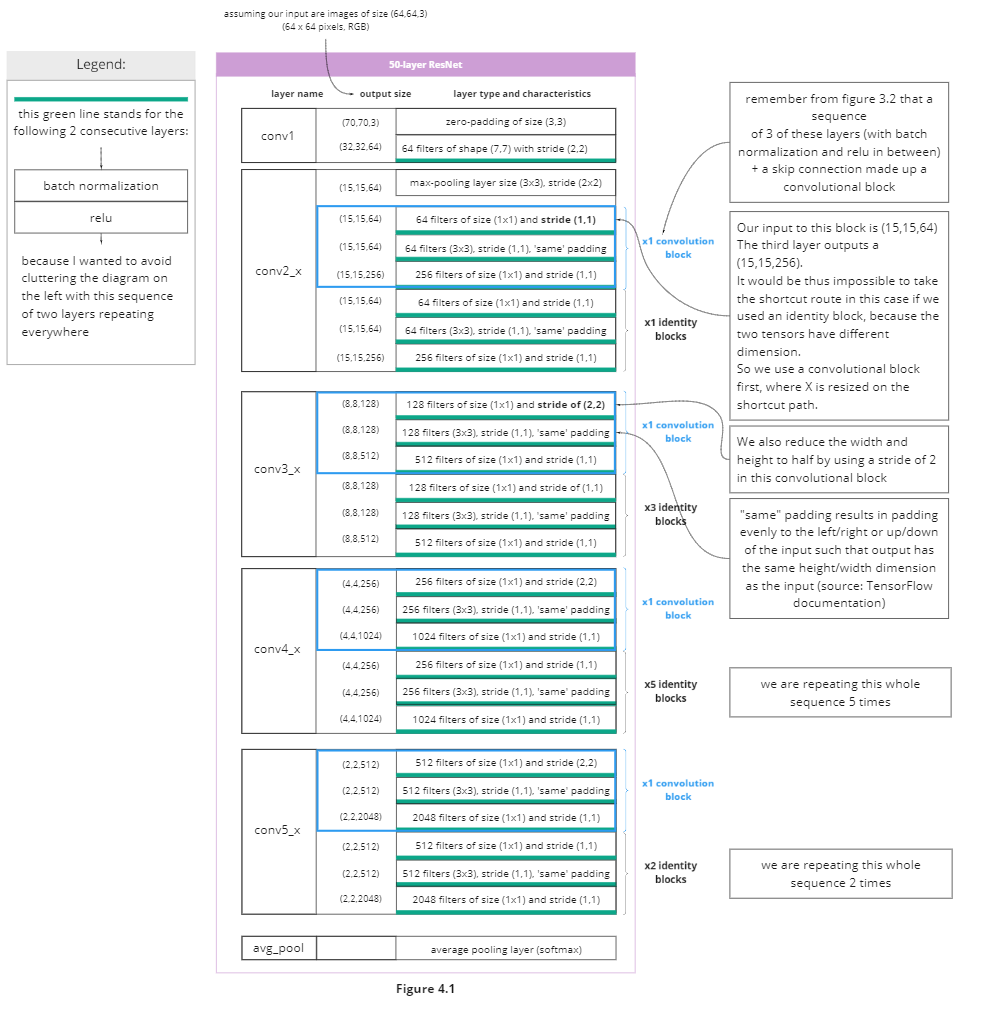

In [10]:
def ResNet50(input_size: Tuple[int, int, int], classes: int) -> Model:
    """
        Builds the ResNet50 model (see Figure 4.1)

        Input:
            input_size - a (height, width, channel) tuple, the shape of the input images
            classes - number of classes the model must learn

        Output:
            model - a Keras Model() instance
    """

    X_input = Input(input_size)

    #====== Level 1 ======#

    # padding
    X = ZeroPadding2D((3,3))(X_input)

    # convolutional layer, followed by batch normalization and relu activation
    X = Conv2D(filters=64, kernel_size=(7, 7), strides=(2, 2), kernel_initializer=glorot_uniform(seed=0), name='conv1_1_1_conv')(X)
    X = BatchNormalization(axis=3, name='conv1_1_1_bn')(X)
    X = Activation('relu')(X)

    #====== Level 2 ======#

    # max pooling layer to halve the size coming from the previous layer
    X = MaxPooling2D((3,3), strides=(2,2))(X)
    
    # 1x convolutional block
    X = convolutional_block(X, level=2, block=1, filters=[64,64,256], s=(1,1))
    # 2x identity blocks
    X = identity_block(X, level=2, block=2, filters=[64,64,256])
    X = identity_block(X, level=2, block=3, filters=[64,64,256])

    #====== Level 3 ======#

    # 1x convolutional block
    X = convolutional_block(X, level=3, block=1, filters=[128,128,512], s=(2,2))

    # 3x identity blocks
    X = identity_block(X, level=3, block=2, filters=[128,128,512])
    X = identity_block(X, level=3, block=3, filters=[128,128,512])
    X = identity_block(X, level=3, block=4, filters=[128,128,512])

    #====== Level 4 ======#
    
    # 1x convolutional block
    X = convolutional_block(X, level=4, block=1, filters=[256,256,1024], s=(2,2))

    # 5x identity blocks
    X = identity_block(X, level=4, block=2, filters=[256,256,1024])
    X = identity_block(X, level=4, block=3, filters=[256,256,1024])
    X = identity_block(X, level=4, block=4, filters=[256,256,1024])
    X = identity_block(X, level=4, block=5, filters=[256,256,1024])
    X = identity_block(X, level=4, block=6, filters=[256,256,1024])

    #====== Level 5 ======#

    # 1x convolutional block
    X = convolutional_block(X, level=5, block=1, filters=[512,512,2048], s=(2,2))

    # 2x identity blocks
    X = identity_block(X, level=5, block=2, filters=[512,512,2048])
    X = identity_block(X, level=5, block=3, filters=[512,512,2048])

    # Pooling layers
    X = AveragePooling2D(pool_size=(2,2), name='avg_pool')(X)

    # Output layer
    X = Flatten()(X)
    X = Dense(classes, activation='softmax', kernel_initializer=glorot_uniform(seed=0), name='fc'+str(classes))(X)

    # Create Model
    model = Model(inputs=X_input, outputs=X, name="ResNet50")
    return model

In [11]:
resnet50 = ResNet50((224,224,3), 1000)
resnet50.summary()

Model: "ResNet50"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ zero_padding2d      │ (None, 230, 230,  │          0 │ input_layer_4[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_1_1_conv      │ (None, 112, 112,  │      9,472 │ zero_padding2d[0… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_1_1_bn        │ (None, 112, 112,  │        256 │ conv1_1_1_conv[0… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_8        │ (None, 112, 112,  │          0 │ conv1_1_1_bn[0][… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_21    │ (None, 55, 55,    │          0 │ activation_8[0][… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_1_1_conv      │ (None, 55, 55,    │      4,160 │ max_pooling2d_21… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_1_1_bn        │ (None, 55, 55,    │        256 │ conv2_1_1_conv[0… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_1_1_relu      │ (None, 55, 55,    │          0 │ conv2_1_1_bn[0][… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_1_2_conv      │ (None, 55, 55,    │     36,928 │ conv2_1_1_relu[0… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_1_2_bn        │ (None, 55, 55,    │        256 │ conv2_1_2_conv[0… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_1_2_relu      │ (None, 55, 55,    │          0 │ conv2_1_2_bn[0][… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_1_3_conv      │ (None, 55, 55,    │     16,640 │ conv2_1_2_relu[0… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_1_short_conv  │ (None, 55, 55,    │     16,640 │ max_pooling2d_21… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_1_3_bn        │ (None, 55, 55,    │      1,024 │ conv2_1_3_conv[0… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_1_short_bn    │ (None, 55, 55,    │      1,024 │ conv2_1_short_co… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 55, 55,    │          0 │ conv2_1_3_bn[0][

 Total params: 42,020,712 (160.30 MB)

 Trainable params: 41,967,592 (160.09 MB)

 Non-trainable params: 53,120 (207.50 KB)

# Xception
*François Chollet, “Xception: Deep Learning with Depthwise Separable Convolutions”, arXiv preprint arXiv:1610.02357 (2016).*

**Xception** (which stands for Extreme Inception) was proposed in 2016 by François Chollet (the author of Keras), and it significantly outperformed Inception-v3 on a huge vision task (350 million images and 17,000 classes). Just like Inception-v4, it merges the ideas of GoogLeNet and ResNet, but it replaces the inception modules with a special type of layer called a depthwise separable convolution layer.

These layers had been used before in some CNN architectures, but they were not as central as in the Xception architecture. While a regular convolutional layer uses filters that try to simultaneously capture spatial patterns (e.g., an oval) and cross-channel patterns (e.g., mouth + nose + eyes = face), a separable convolutional layer makes the strong assumption that spatial patterns and cross-channel patterns can be modeled separately. Thus, it is composed of two parts: the first part applies a single spatial filter to each input feature map, then the second part looks exclusively for cross-channel patterns—it is just a regular convolutional layer with 1 × 1 filters.

![image7.png](https://maelfabien.github.io/assets/images/xception.jpg)

## Entry Flow

In [12]:
def entry_flow(inputs):
    # Block 1
    X = Conv2D(filters=32, kernel_size=(3,3), strides=(2,2))(inputs)
    X = BatchNormalization()(X)
    X = Activation('relu')(X)

    X = Conv2D(filters=64, kernel_size=(3,3))(X)
    X = BatchNormalization()(X)
    X = Activation('relu')(X)

    X_shortcut = X

    for size in [128, 256, 728]:
        X = SeparableConv2D(filters=size, kernel_size=(3,3), padding='same')(X)
        X = BatchNormalization()(X)
        X = Activation('relu')(X)

        X = SeparableConv2D(filters=size, kernel_size=(3,3), padding='same')(X)
        X = BatchNormalization()(X)
        X = MaxPooling2D((3,3), strides=(2,2), padding='same')(X)

        residual = Conv2D(filters=size, kernel_size=(1,1), strides=(2,2), padding='same')(X_shortcut)
        residual = BatchNormalization()(residual)

        X = Add()([X, residual])
        X_shortcut = X

    return X

## Middle Flow

In [13]:
def middle_flow(X, num_blocks=8):
    X_shortcut = X

    for _ in range(num_blocks):
        X = Activation('relu')(X)
        X = SeparableConv2D(filters=728, kernel_size=(3,3), padding='same')(X)
        X = BatchNormalization()(X)
        
        X = Activation('relu')(X)
        X = SeparableConv2D(filters=728, kernel_size=(3,3), padding='same')(X)
        X = BatchNormalization()(X)
        
        X = Activation('relu')(X)
        X = SeparableConv2D(filters=728, kernel_size=(3,3), padding='same')(X)
        X = BatchNormalization()(X)

        X = Add()([X, X_shortcut])
        X_shortcut = X
        
    return X

## Exit Flow

In [14]:
def exit_flow(X):
    X_shortcut = X

    X = Activation('relu')(X)
    X = SeparableConv2D(filters=728, kernel_size=(3,3), padding='same')(X)
    X = BatchNormalization()(X)
    
    X = Activation('relu')(X)
    X = SeparableConv2D(filters=1024, kernel_size=(3,3), padding='same')(X)
    X = BatchNormalization()(X)

    X = MaxPooling2D((3,3), strides=(2,2), padding='same')(X)

    residual = Conv2D(filters=1024, kernel_size=(1,1), strides=(2,2), padding='same')(X_shortcut)

    X = Add()([X, residual])

    X = SeparableConv2D(filters=1536, kernel_size=(3,3), padding='same')(X)
    X = BatchNormalization()(X)
    X = Activation('relu')(X)
    
    X = SeparableConv2D(filters=2048, kernel_size=(3,3), padding='same')(X)
    X = BatchNormalization()(X)
    X = Activation('relu')(X)

    X = GlobalAveragePooling2D()(X)
    X = Dense(1000, activation='softmax')(X)

    return X

**Now let's build the Xception model**

In [15]:
inputs = Input(shape=(229, 229, 3))
outputs = exit_flow(middle_flow(entry_flow(inputs)))

xception = Model(inputs=inputs, outputs=outputs, name='Xception')
xception.summary()

Model: "Xception"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_5       │ (None, 229, 229,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_80 (Conv2D)  │ (None, 114, 114,  │        896 │ input_layer_5[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 114, 114,  │        128 │ conv2d_80[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_9        │ (None, 114, 114,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_81 (Conv2D)  │ (None, 112, 112,  │     18,496 │ activation_9[0][… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 112, 112,  │        256 │ conv2d_81[0][0]   │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_10       │ (None, 112, 112,  │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ separable_conv2d    │ (None, 112, 112,  │      8,896 │ activation_10[0]… │
│ (SeparableConv2D)   │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 112, 112,  │        512 │ separable_conv2d… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_11       │ (None, 112, 112,  │          0 │ batch_normalizat… │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ separable_conv2d_1  │ (None, 112, 112,  │     17,664 │ activation_11[0]… │
│ (SeparableConv2D)   │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 112, 112,  │        512 │ separable_conv2d… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_82 (Conv2D)  │ (None, 56, 56,    │      8,320 │ activation_10[0]… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_22    │ (None, 56, 56,    │          0 │ batch_normalizat… │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 56, 56,    │        512 │ conv2d_82[0][0]   │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_16 (Add)        │ (None, 56, 56,    │          0 │ max_pooling2d_22… │
│                     │ 128)              │            │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ separable_conv2d_2  │ (None, 56, 56,    │     34,176 │ add_16[0][0]    

 Total params: 22,933,648 (87.48 MB)

 Trainable params: 22,881,168 (87.28 MB)

 Non-trainable params: 52,480 (205.00 KB)

# SENet
*Jie Hu et al., “Squeeze-and-Excitation Networks”, Proceedings of the IEEE Conference on Computer Vision and Pattern Recognition (2018): 7132–7141.*

The winning architecture in the ILSVRC 2017 challenge was the Squeeze-andExcitation Network (SENet). This architecture extends existing architectures such as inception networks and ResNets, and boosts their performance. This allowed SENet to win the competition with an astonishing 2.25% top-five error rate! The extended versions of inception networks and ResNets are called SE-Inception and SE-ResNet, respectively. The main idea is this:
> **Let's add parameters to each channel of a convolutional block so that the network can adaptively adjust the weighting of each feature map.**



![image8.png](https://viso.ai/wp-content/uploads/2024/03/squeeze-excite.png)

**Now we'll create a SE-ResNet**

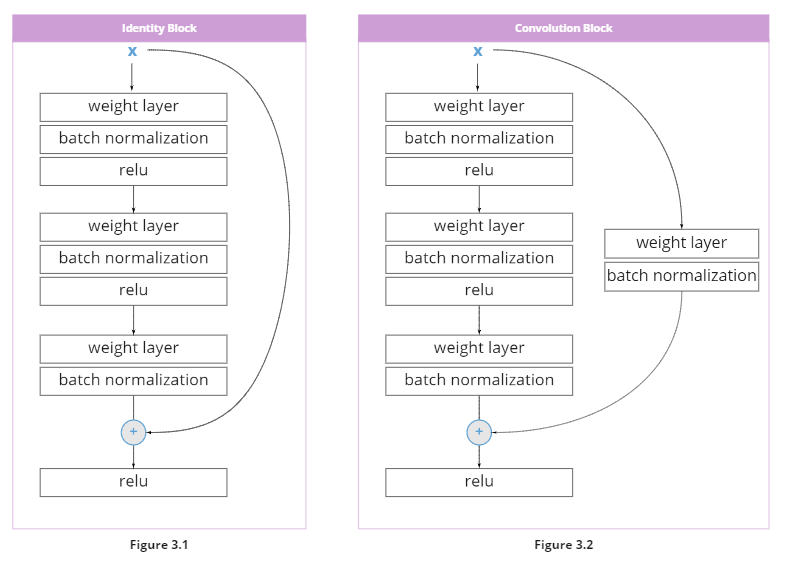

## Identity Block with SE block

In [16]:
def se_identity_block(X: tf.Tensor, level: int, block: int, filters: List[int]) -> tf.Tensor:
    """
    Creates an identity block for SE-ResNet(see Figure 3.1)

    Input:
        X - input tensor of shape (m, height_prev, width_prev, channels_prev)
        level - integer, one of the 5 levels that our networks is conceptually divided into
        block - integer, each conceptual level has multiple blocks
        filters - list of integers, each of them defining the number of filters in each convolutional layer

    Output:
        X - output tensor of shape (m, height, width, channels)
    """

    # naming of layers
    conv_name = f'conv{level}_{block}' + '_{layer}_{type}'
    
    # unpacking number of filters
    f1, f2, f3 = filters
    
    # shortcut branch
    X_shortcut = X

    # first convolutional layer
    X = Conv2D(filters=f1, kernel_size=(1,1), strides=(1,1), padding='valid', kernel_initializer=glorot_uniform(seed=0), name=conv_name.format(layer=1, type="conv"))(X)
    X = BatchNormalization(axis=3, name=conv_name.format(layer=1, type='bn'))(X)
    X = Activation('relu', name=conv_name.format(layer=1, type='relu'))(X)

    # second convolutional layer
    X = Conv2D(filters=f2, kernel_size=(3,3), strides=(1,1), padding='same', kernel_initializer=glorot_uniform(seed=0), name=conv_name.format(layer=2, type="conv"))(X)
    X = BatchNormalization(axis=3, name=conv_name.format(layer=2, type='bn'))(X)
    X = Activation('relu', name=conv_name.format(layer=2, type='relu'))(X)

    # third convolutional layer
    X = Conv2D(filters=f3, kernel_size=(1,1), strides=(1,1), padding='valid', kernel_initializer=glorot_uniform(seed=0), name=conv_name.format(layer=3, type="conv"))(X)
    X = BatchNormalization(axis=3, name=conv_name.format(layer=3, type='bn'))(X)

    # Squeeze and Excitation Block
    se = GlobalAveragePooling2D(name=conv_name.format(layer=4, type='pool'))(X)
    se = Dense(units=f3 // 16, activation='relu', name=conv_name.format(layer=5, type='fc'))(se)
    se = Dense(units=f3, activation='sigmoid', name=conv_name.format(layer=6, type='fc'))(se)
    se = Reshape([1, 1, f3])(se)
    X = Multiply(name=conv_name.format(layer=7, type='scale'))([X, se])

    # add shortcut branch to main path
    X = Add()([X, X_shortcut])

    # relu activation at the end of block
    X = Activation('relu', name=conv_name.format(layer=3, type='relu'))(X)

    return X

## Convolutional Block with SE block

In [17]:
def se_convolutional_block(X: tf.Tensor, level: int, block: int, filters: List[int], s: Tuple[int, int, int]=(2,2)) -> tf.Tensor:
    """
    Creates a convolutional block(see Figure 3.2)

    Input:
        X - input tensor of shape (m, height_prev, width_prev, channels_prev)
        level - integer, one of the 5 levels that our networks is conceptually divided into
        block - integer, each conceptual level has multiple blocks
        filters - list of integers, each of them defining the number of filters in each convolutional layer
        s   - stride of the first layer;
            - a conv layer with a filter that has a stride of 2 will reduce the width and height of its input by half

    Output:
        X - output tensor of shape (m, height, width, channels)
    """
    
    # naming of layers
    conv_name = f'conv{level}_{block}' + '_{layer}_{type}'
    
    # unpacking number of filters
    f1, f2, f3 = filters
    
    # shortcut branch
    X_shortcut = X

    # first convolutional layer
    X = Conv2D(filters=f1, kernel_size=(1,1), strides=s, padding='valid', kernel_initializer=glorot_uniform(seed=0), name=conv_name.format(layer=1, type="conv"))(X)
    X = BatchNormalization(axis=3, name=conv_name.format(layer=1, type='bn'))(X)
    X = Activation('relu', name=conv_name.format(layer=1, type='relu'))(X)

    # second convolutional layer
    X = Conv2D(filters=f2, kernel_size=(3,3), strides=(1,1), padding='same', kernel_initializer=glorot_uniform(seed=0), name=conv_name.format(layer=2, type="conv"))(X)
    X = BatchNormalization(axis=3, name=conv_name.format(layer=2, type='bn'))(X)
    X = Activation('relu', name=conv_name.format(layer=2, type='relu'))(X)

    # third convolutional layer
    X = Conv2D(filters=f3, kernel_size=(1,1), strides=(1,1), padding='valid', kernel_initializer=glorot_uniform(seed=0), name=conv_name.format(layer=3, type="conv"))(X)
    X = BatchNormalization(axis=3, name=conv_name.format(layer=3, type='bn'))(X)

    # Squeeze and Excitation Block
    se = GlobalAveragePooling2D(name=conv_name.format(layer=4, type='pool'))(X)
    se = Dense(units=f3 // 16, activation='relu', name=conv_name.format(layer=5, type='fc'))(se)
    se = Dense(units=f3, activation='sigmoid', name=conv_name.format(layer=6, type='fc'))(se)
    se = Reshape([1, 1, f3])(se)
    X = Multiply(name=conv_name.format(layer=7, type='scale'))([X, se])

    # shortcut path
    X_shortcut = Conv2D(filters=f3, kernel_size=(1,1), strides=s, padding='valid', kernel_initializer=glorot_uniform(seed=0), name=conv_name.format(layer='short', type="conv"))(X_shortcut)
    X_shortcut = BatchNormalization(axis=3, name=conv_name.format(layer='short', type='bn'))(X_shortcut)

    # add shortcut branch to main path
    X = Add()([X, X_shortcut])

    # relu activation at the end of block
    X = Activation('relu', name=conv_name.format(layer=3, type='relu'))(X)

    return X

## Design the SE-ResNet50 Model

![image10.png](https://doimages.nyc3.cdn.digitaloceanspaces.com/010AI-ML/content/images/2020/09/SE-ResNet-module.jpg)

In [18]:
def SEResNet50(input_size: Tuple[int, int, int], classes: int) -> Model:
    """
        Builds the SE-ResNet50 model

        Input:
            input_size - a (height, width, channel) tuple, the shape of the input images
            classes - number of classes the model must learn

        Output:
            model - a Keras Model() instance
    """

    X_input = Input(input_size)

    #====== Level 1 ======#

    # padding
    X = ZeroPadding2D((3,3))(X_input)

    # convolutional layer, followed by batch normalization and relu activation
    X = Conv2D(filters=64, kernel_size=(7, 7), strides=(2, 2), kernel_initializer=glorot_uniform(seed=0), name='conv1_1_1_conv')(X)
    X = BatchNormalization(axis=3, name='conv1_1_1_nb')(X)
    X = Activation('relu')(X)

    #====== Level 2 ======#

    # max pooling layer to halve the size coming from the previous layer
    X = MaxPooling2D((3,3), strides=(2,2))(X)
    
    # 1x convolutional block
    X = se_convolutional_block(X, level=2, block=1, filters=[64,64,256], s=(1,1))
    # 2x identity blocks
    X = se_identity_block(X, level=2, block=2, filters=[64,64,256])
    X = se_identity_block(X, level=2, block=3, filters=[64,64,256])

    #====== Level 3 ======#

    # 1x convolutional block
    X = se_convolutional_block(X, level=3, block=1, filters=[128,128,512], s=(2,2))

    # 3x identity blocks
    X = se_identity_block(X, level=3, block=2, filters=[128,128,512])
    X = se_identity_block(X, level=3, block=3, filters=[128,128,512])
    X = se_identity_block(X, level=3, block=4, filters=[128,128,512])

    #====== Level 4 ======#
    
    # 1x convolutional block
    X = se_convolutional_block(X, level=4, block=1, filters=[256,256,1024], s=(2,2))

    # 5x identity blocks
    X = se_identity_block(X, level=4, block=2, filters=[256,256,1024])
    X = se_identity_block(X, level=4, block=3, filters=[256,256,1024])
    X = se_identity_block(X, level=4, block=4, filters=[256,256,1024])
    X = se_identity_block(X, level=4, block=5, filters=[256,256,1024])
    X = se_identity_block(X, level=4, block=6, filters=[256,256,1024])

    #====== Level 5 ======#

    # 1x convolutional block
    X = se_convolutional_block(X, level=5, block=1, filters=[512,512,2048], s=(2,2))

    # 2x identity blocks
    X = se_identity_block(X, level=5, block=2, filters=[512,512,2048])
    X = se_identity_block(X, level=5, block=3, filters=[512,512,2048])

    # Pooling layers
    X = AveragePooling2D(pool_size=(2,2), name='avg_pool')(X)

    # Output layer
    X = Flatten()(X)
    X = Dense(classes, activation='softmax', kernel_initializer=glorot_uniform(seed=0), name='fc'+str(classes))(X)

    # Create Model
    model = Model(inputs=X_input, outputs=X, name="SE-ResNet50")
    return model

In [19]:
seresnet50 = SEResNet50((224,224,3), 1000)
seresnet50.summary()

Model: "SE-ResNet50"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_6       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ zero_padding2d_1    │ (None, 230, 230,  │          0 │ input_layer_6[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_1_1_conv      │ (None, 112, 112,  │      9,472 │ zero_padding2d_1… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_1_1_nb        │ (None, 112, 112,  │        256 │ conv1_1_1_conv[0… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_42       │ (None, 112, 112,  │          0 │ conv1_1_1_nb[0][… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_26    │ (None, 55, 55,    │          0 │ activation_42[0]… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_1_1_conv      │ (None, 55, 55,    │      4,160 │ max_pooling2d_26… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_1_1_bn        │ (None, 55, 55,    │        256 │ conv2_1_1_conv[0… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_1_1_relu      │ (None, 55, 55,    │          0 │ conv2_1_1_bn[0][… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_1_2_conv      │ (None, 55, 55,    │     36,928 │ conv2_1_1_relu[0… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_1_2_bn        │ (None, 55, 55,    │        256 │ conv2_1_2_conv[0… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_1_2_relu      │ (None, 55, 55,    │          0 │ conv2_1_2_bn[0][… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_1_3_conv      │ (None, 55, 55,    │     16,640 │ conv2_1_2_relu[0… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_1_3_bn        │ (None, 55, 55,    │      1,024 │ conv2_1_3_conv[0… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_1_4_pool      │ (None, 256)       │          0 │ conv2_1_3_bn[0][… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_1_5_fc        │ (None, 16)        │      4,112 │ conv2_1_4_pool[0… │
│ (Dense)             │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_1_6_fc        │ (None, 256)       │      4,352 │ conv2_1_5_fc[0][

 Total params: 44,551,704 (169.95 MB)

 Trainable params: 44,498,584 (169.75 MB)

 Non-trainable params: 53,120 (207.50 KB)

# Conclusion

**Now that we have implemented the major architectures that laid the foundations of modern CNNs, we can step back and examine the ideas they introduced.**

### Core Ideas Behind the Architectures

Although these architectures appear very different on the surface, many of them are variations on shared ideas rather than entirely new inventions. VGGNet demonstrated that depth itself is a powerful representational tool, a lesson that ResNet later made scalable through residual connections. GoogLeNet’s Inception modules introduced the idea of multi-scale feature extraction within a single layer, an intuition that later resurfaced in grouped and depthwise convolutions. SENet shifted attention from spatial structure to channel-wise importance, anticipating the broader move toward attention mechanisms. Xception can be seen as a logical extreme of this evolution, separating spatial and channel-wise learning almost entirely. Together, these models form a chain of ideas rather than isolated milestones.

- LeNet-5: Proof of concept for CNNs
- AlexNet: Scale, GPUs, and non-linear activations
- VGGNet: Depth through uniform design
- GoogLeNet: Multi-scale feature extraction
- ResNet: Residual learning for very deep networks
- SENet: Channel-wise feature recalibration
- Xception: Extreme depthwise separability



### Limitations and Trade-offs


Each architecture here is a solution to a specific problem—and each introduces new constraints. VGGNet’s simplicity comes at the cost of an enormous parameter count. GoogLeNet reduces computation but increases architectural complexity, making it harder to modify or debug. Very deep plain networks suffer from optimization difficulties, which ResNet addresses but does not entirely eliminate. SENet improves representational power with minimal overhead, yet adds another layer of architectural tuning. Xception gains efficiency but relies heavily on assumptions about feature separability. These trade-offs highlight why no single architecture dominates all scenarios.

Revisiting these architectures makes one pattern clear: progress in computer vision is driven less by brute force and more by sharp architectural insights. Ideas like depthwise-separable convolutions, residual learning, multi-scale processing, channel attention did not replace one another—they accumulated. 

There are several other influential architectures—such as ConvNeXt, EfficientNet, ResNeXt, Inception-v4, and DenseNet—that are not covered here, as including every major variant in a single notebook would dilute the focus and become overwhelming. The emphasis instead is on understanding the core ideas that shaped the evolution of CNNs, ideas that many later models continue to build upon.

Thank You!